In [1]:
# Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
# import Dataset
Data = pd.read_csv('/content/Data_new.csv')

In [3]:
print(Data)

    Total_credit  X3C  X3E  X4C  X4E  X5C  X5E  X6C  X7C  X7E  ...  J4E  J5C  \
0             11    6    0    0    0    0    0    0    0    0  ...    0    0   
1             61   25    0   15    0    0    0    0    0    0  ...    0    0   
2             52   25    0   15    0    0    0    0    0    0  ...    0    0   
3             49   25    0   12    0    0    0    0    0    0  ...    0    0   
4            152   25    0   20    2   23    0    6    7    7  ...    2    3   
5             69   25    0   20    0    0    0    0    0    0  ...    0    0   
6              8    8    0    0    0    0    0    0    0    0  ...    0    0   
7            141   25    0   20    2   23    0    6    7    4  ...    2    3   
8             17   10    0    0    0    0    0    0    0    0  ...    0    0   
9             20    5    0    3    0    0    0    0    0    0  ...    0    0   
10            56   25    2   15    0    0    0    0    0    0  ...    0    0   
11            73   25    2   20    0    

In [4]:
print(Data['Class'].unique())

['level 3' 'level 7' 'level 4' 'level 6' 'level 5']


In [5]:
# Map values for each column individually
Data['Class'] = Data['Class'].map({'level 3': 0, 'level 4': 1, 'level 5': 2, 'level 6': 3, 'level 7': 4})

In [6]:
print(Data.head())

   Total_credit  X3C  X3E  X4C  X4E  X5C  X5E  X6C  X7C  X7E  ...  J4E  J5C  \
0            11    6    0    0    0    0    0    0    0    0  ...    0    0   
1            61   25    0   15    0    0    0    0    0    0  ...    0    0   
2            52   25    0   15    0    0    0    0    0    0  ...    0    0   
3            49   25    0   12    0    0    0    0    0    0  ...    0    0   
4           152   25    0   20    2   23    0    6    7    7  ...    2    3   

   J5E  M3C  M4C  M5C  M6C  W4C  W5C  Class  
0    0    0    0    0    0    0    0      0  
1    0    2    3    0    0    0    0      0  
2    0    2    0    0    0    0    0      0  
3    0    2    0    0    0    0    0      0  
4    0    2    3    4    8    3    5      4  

[5 rows x 26 columns]


In [7]:
# Class divide
X = Data.iloc[:, :-1]
y = Data.iloc[:, -1]

In [8]:
# Verify that X and y
print("Features (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())

Features (X):
   Total_credit  X3C  X3E  X4C  X4E  X5C  X5E  X6C  X7C  X7E  ...  J3E  J4E  \
0            11    6    0    0    0    0    0    0    0    0  ...    0    0   
1            61   25    0   15    0    0    0    0    0    0  ...    0    0   
2            52   25    0   15    0    0    0    0    0    0  ...    0    0   
3            49   25    0   12    0    0    0    0    0    0  ...    0    0   
4           152   25    0   20    2   23    0    6    7    7  ...    0    2   

   J5C  J5E  M3C  M4C  M5C  M6C  W4C  W5C  
0    0    0    0    0    0    0    0    0  
1    0    0    2    3    0    0    0    0  
2    0    0    2    0    0    0    0    0  
3    0    0    2    0    0    0    0    0  
4    3    0    2    3    4    8    3    5  

[5 rows x 25 columns]

Target (y):
0    0
1    0
2    0
3    0
4    4
Name: Class, dtype: int64


---------------------------- Training Dataset Using SVM ----------------------------

In [9]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [14]:
#Train with RandomForestClassifier
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy*100:.4f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 86.6667%
Precision: 0.8167
Recall: 0.8667
F1 Score: 0.8381


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
# Calculate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)

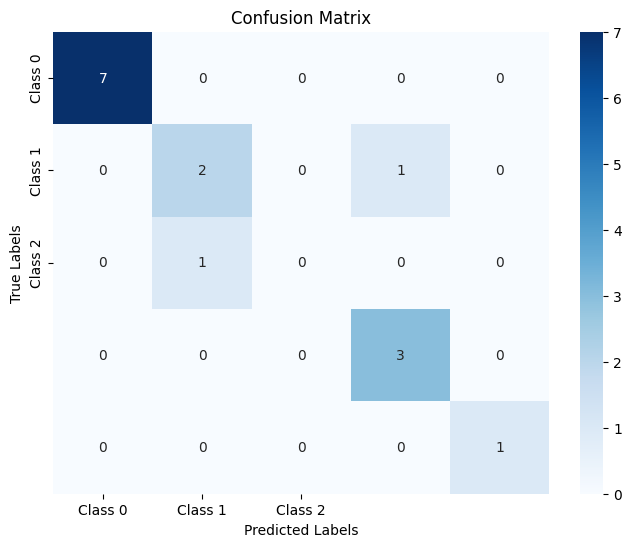

In [17]:
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=["Class 0", "Class 1", "Class 2"], yticklabels=["Class 0", "Class 1", "Class 2"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

---------------------------- Prepare receive input ----------------------------

In [18]:
def calculate_credits(course_comp_input, course_elec_input):
    # Split the input strings into lists of course codes
    comp_courses = course_comp_input.replace(" ", "").split(",")
    elec_courses = course_elec_input.replace(" ", "").split(",")

    # Combine compulsory and elective courses
    courses = comp_courses + elec_courses

    # Valid categories, levels, and course codes
    valid_categories = {'X', 'Y', 'Z', 'M', 'J', 'W'}
    valid_levels = {'3', '4', '5', '6', '7'}
    valid_course_codes = {'X3C', 'X3E', 'X4C', 'X4E', 'X5C', 'X5E', 'X6C', 'X7C', 'X7E', 'Y4C', 'Y7C', 'Z3C',
                          'Z4C', 'Z5C', 'J3E', 'J4E', 'J5C', 'J5E', 'M3C', 'M4C', 'M5C', 'M6C', 'W4C', 'W5C'}

    # Dictionary to store the calculated credits by category and level
    credits_by_category_level = {code: 0 for code in valid_course_codes}

    # List to store invalid course codes
    invalid_codes = []

    # Iterate through each course
    for course in courses:
        # Validate the course code
        if len(course) != 7 or course[2] not in valid_categories or course[3] not in valid_levels or not course[4].isdigit():
            invalid_codes.append(course)
            continue

        # Extract the category, level, and credit from the course code
        category = course[2]  # 3rd letter (category)
        level = course[3]     # 4th digit (level)
        credit = int(course[4])  # 5th digit (credit)

        # Create a key in the format 'CategoryLevelC'
        key = f"{category}{level}C" or f"{category}{level}E"

        # Add the credit to the respective category and level
        if key in valid_course_codes:
            if key in credits_by_category_level:
                credits_by_category_level[key] += credit
            else:
                credits_by_category_level[key] = credit
        else:
            invalid_codes.append(course)

    total_credits = sum(credits_by_category_level.values())

    # Return the total credits and the credits by category-level dictionary as a feature set
    return {"Total_credit": total_credits, **credits_by_category_level}, invalid_codes


    # Print the results
    for key, total_credit in credits_by_category_level.items():
        print(f"{key} = {total_credit} credits")

    # Display invalid course codes, if any
    if invalid_codes:
        for code in invalid_codes:
          output_array.append(f"There is no '{code}' course code in your degree.")
           # print(f"There is no '{code}' course code in your degree.")


    total_credits = sum(credits_by_category_level.values())
    output_array.append(f"Total_credits = {total_credits} credits")
    #print(f"Total_credits = {total_credits} credits")

# Get course codes input from the user
course_comp_input = input("Enter Compulsory course codes (Ex:EEX7436, MHZ5554, ....): ")
course_elec_input = input("Enter Elective course codes (Ex:EEX7244, EEX7241, ....): ")

# Call the function to calculate credits
#credits_output = calculate_credits(course_comp_input, course_elec_input)

credit_features, invalid_codes = calculate_credits(course_comp_input, course_elec_input)
print("Credit Features:", credit_features)

Enter Compulsory course codes (Ex:EEX7436, MHZ5554, ....): EEX7436, DMM6601, EEX6335
Enter Elective course codes (Ex:EEX7244, EEX7241, ....): EEX7436, DMM6601, EEX6335
Credit Features: {'Total_credit': 26, 'X3E': 0, 'X6C': 6, 'X7E': 0, 'Y7C': 0, 'J5C': 0, 'Y4C': 0, 'X7C': 8, 'J4E': 0, 'J5E': 0, 'X3C': 0, 'M6C': 12, 'J3E': 0, 'W4C': 0, 'W5C': 0, 'Z3C': 0, 'M5C': 0, 'Z4C': 0, 'X4E': 0, 'X5C': 0, 'X5E': 0, 'M4C': 0, 'X4C': 0, 'Z5C': 0, 'M3C': 0}


In [19]:
desired_order = [
    'Total_credit', 'X3C', 'X3E', 'X4C', 'X4E', 'X5C', 'X5E', 'X6C', 'X7C', 'X7E', 'Y4C', 'Y7C',
    'Z3C', 'Z4C', 'Z5C', 'J3E', 'J4E', 'J5C', 'J5E', 'M3C', 'M4C', 'M5C', 'M6C', 'W4C', 'W5C'
]

# Reordering the dictionary
ordered_credit_features = {key: credit_features.get(key, 0) for key in desired_order}

# Print the ordered output
print(ordered_credit_features)

{'Total_credit': 26, 'X3C': 0, 'X3E': 0, 'X4C': 0, 'X4E': 0, 'X5C': 0, 'X5E': 0, 'X6C': 6, 'X7C': 8, 'X7E': 0, 'Y4C': 0, 'Y7C': 0, 'Z3C': 0, 'Z4C': 0, 'Z5C': 0, 'J3E': 0, 'J4E': 0, 'J5C': 0, 'J5E': 0, 'M3C': 0, 'M4C': 0, 'M5C': 0, 'M6C': 12, 'W4C': 0, 'W5C': 0}


--------------------------- Test the code by using our inputs ---------------------------

In [20]:
# Assuming these are the features your model expects
input_features = pd.DataFrame([ordered_credit_features])

print(input_features)

# Predict the class (academic level) based on the credit features
predicted_class = model.predict(input_features)

# Convert numerical prediction back to class label if necessary
class_mapping = {0: 'level 3', 1: 'level 4', 2: 'level 5', 3: 'level 6', 4: 'level 7'}
predicted_lable = class_mapping[predicted_class[0]]

# Print the predicted academic level
print(f"Predicted Academic Level: {predicted_lable}")

   Total_credit  X3C  X3E  X4C  X4E  X5C  X5E  X6C  X7C  X7E  ...  J3E  J4E  \
0            26    0    0    0    0    0    0    6    8    0  ...    0    0   

   J5C  J5E  M3C  M4C  M5C  M6C  W4C  W5C  
0    0    0    0    0    0   12    0    0  

[1 rows x 25 columns]
Predicted Academic Level: level 3
